In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

0

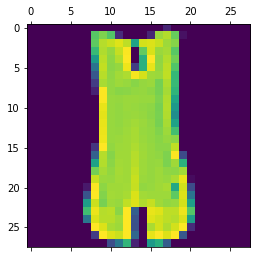

In [5]:
plt.matshow(X_train[4])
y_train[4]

In [6]:
# Explore the dataset
# Check the shape and size of x_train, x_test, y_train, y_test
print ("Number of samples/observations in training data: " + str(len(X_train)))
print ("Number of labels in training data: " + str(len(y_train)))
print ("Dimensions of a single image in x_train:" + str(X_train[0].shape))
print("-------------------------------------------------------------")
print ("Number of samples/observations in test data: " + str(len(X_test)))
print ("Number of labels in test data: " + str(len(y_test)))
print ("Dimensions of single image in x_test:" + str(X_test[0].shape))

Number of samples/observations in training data: 60000
Number of labels in training data: 60000
Dimensions of a single image in x_train:(28, 28)
-------------------------------------------------------------
Number of samples/observations in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in x_test:(28, 28)


In [7]:
#Import necessary keras specific libraries

from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

In [8]:
# Storing the number of rows and columns
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]

In [9]:
''' Getting the data in the right 'shape' as required by Keras i.e. adding a 4th 
dimension to our data thereby changing the original image shape of (60000,28,28) 
to (60000,28,28,1)'''

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
# Storing the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [12]:
# Changing image type to float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
# Normalizing the data by changing the image pixel range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /= 255

In [14]:
# Calculate the number of classes and number of pixels 
# num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

In [15]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [16]:
model_fitting = model.fit(X_train, y_train,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 75s 39ms/step - loss: 0.4360 - accuracy: 0.8475 - val_loss: 0.2838 - val_accuracy: 0.8963
Epoch 2/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2935 - accuracy: 0.8961 - val_loss: 0.2587 - val_accuracy: 0.9068
Epoch 3/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2655 - accuracy: 0.9056 - val_loss: 0.2530 - val_accuracy: 0.9071
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2305 - accuracy: 0.9163 - val_loss: 0.2320 - val_accuracy: 0.9122
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2029 - accuracy: 0.9262 - val_loss: 0.2167 - val_accuracy: 0.9230
Test loss: 0.2166736125946045
Test accuracy: 0.9229999780654907


In [17]:
# Save the model with the name clothing_classification_model
model.save('clothing_classification_model.h5')

In [18]:
# Part 4 - Making a single prediction
import numpy as np
from tensorflow.keras.preprocessing import image
def predict_img(img):

    test_image = image.load_img(img, color_mode = "grayscale",target_size = (28,28))
    test_image = image.img_to_array(test_image)
    test_image = test_image.reshape(1, 28, 28, 1)
    test_image = test_image.astype('float32')
    test_image=test_image/255
    result = model.predict(test_image)
    class_prediction = np.argmax(result)
    
    #Map apparel category with the numerical class
    if class_prediction == 0:
      product = "T-shirt/top"
    elif class_prediction == 1:
      product = "Trouser"
    elif class_prediction == 2:
      product = "Pullover"
    elif class_prediction == 3:
      product = "Dress"
    elif class_prediction == 4:
      product = "Coat"
    elif class_prediction == 5:
      product = "Sandal"
    elif class_prediction == 6:
      product = "Shirt"
    elif class_prediction == 7:
      product = "Sneaker"
    elif class_prediction == 8:
      product = "Bag"
    else:
      product = "Ankle boot"
    
    return product
    

In [19]:
predict_img('bag.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'bag.jpg'